<a href="https://colab.research.google.com/github/AkhileshPandeyji/Udacity-deep-gocolab/blob/master/FashionMNIST_CNNipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 2.3MB 3.4MB/s 


In [2]:
# importing modules
import tensorflow as tf
import tensorflow_datasets as tfds
import math 
import matplotlib.pyplot as plt
import numpy as np

print(tf.__version__)
tf.logging.set_verbosity(tf.logging.ERROR)

tf.enable_eager_execution()

tfds.disable_progress_bar()

import tqdm 
import tqdm.auto
tqdm.tqdm =tqdm.auto.tqdm

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

1.14.0


In [3]:
# getting datasets
datasets,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = datasets['train'],datasets['test']

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/1.0.0. Subsequent calls will reuse this data.


In [4]:
# number of examples
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print(num_train_examples,num_test_examples)

60000 10000


In [0]:
# Preprocessing datasets
def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images = images/255
  return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [0]:
# Building Model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=[28,28,1],activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(64,(3,3),padding='same',activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation=tf.nn.relu),
    tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
])

In [0]:
# changing settings of the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
# training model - batching + fitting
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [9]:
history = model.fit(train_dataset,epochs=10,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3945 - acc: 0.8573
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2547 - acc: 0.9083
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2120 - acc: 0.9225
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1808 - acc: 0.9329
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1541 - acc: 0.9433
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1305 - acc: 0.9511
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1122 - acc: 0.9584
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0902 - acc: 0.9672
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0778 - acc: 0.9714
Epoch 10/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0658 - acc: 0.9756


In [10]:
# evaluating across test dataset
test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/BATCH_SIZE))
print("Test Loss: {} , Test Accuracy:{} .".format(test_loss,test_accuracy))

313/313 [==============================] - 3s 11ms/step - loss: 0.3292 - acc: 0.9211
Test Loss: 0.32918656764614485 , Test Accuracy:0.9211000204086304 .


In [0]:
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

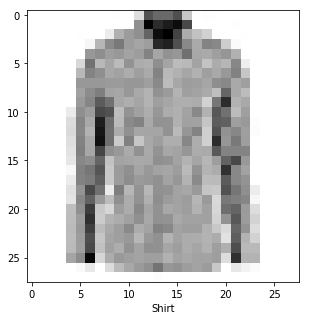

In [15]:
# getting the test image for predicting
for images,labels in test_dataset.take(1):
  test_image = images[0].numpy().reshape([28,28])
  test_label = labels[0].numpy()
  break

# plotting this test image

plt.figure(figsize=(5,5))
plt.grid(False)
plt.imshow(test_image,cmap=plt.cm.binary)
plt.xlabel(class_labels[test_label])
plt.show()

In [17]:
test_image = test_image.reshape([1,28,28,1])
prediction = model.predict(test_image)
print("Predicted label: {}, Actual label: {}.".format(class_labels[np.argmax(prediction)],class_labels[test_label]))

Predicted label: Shirt, Actual label: Shirt.


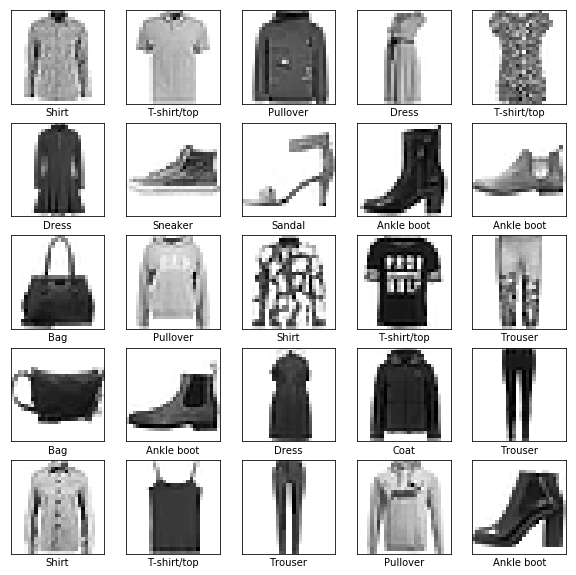

In [20]:
# plotting more images
i=1
plt.figure(figsize=(10,10))
for images,labels in test_dataset.take(25):
  draw_image = images[0].numpy().reshape([28,28])
  draw_label = labels[0].numpy()
  plt.subplot(5,5,i)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(draw_image,cmap=plt.cm.binary)
  plt.xlabel(class_labels[draw_label])
  i+=1
plt.show()